# Procesamiento del lenguaje natural

In [1]:
# NLTK -> libreria que se encarga de buscar y procesar datos.(lenguaje natural)

In [2]:
import nltk

In [3]:
# dataset de spam: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [6]:
cd ../Datasets/nltk

C:\Users\erik_\Curso-IA-Udemy\Datasets\nltk


In [8]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: 9C30-9931

 Directorio de C:\Users\erik_\Curso-IA-Udemy\Datasets\nltk

05/08/2021  19:45    <DIR>          .
05/08/2021  19:45    <DIR>          ..
05/08/2021  19:45    <DIR>          smsspamcollection
               0 archivos              0 bytes
               3 dirs  53.231.681.536 bytes libres


In [20]:
mensajes = list(line.rstrip() for line in open("smsspamcollection/SMSSpamCollection"))

In [21]:
mensajes[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [24]:
mensajes[530]

"ham\tJay says that you're a double-faggot"

In [25]:
len(mensajes)

5574

In [26]:
for mensaje in enumerate(mensajes[:10]):
    print(mensaje)

(0, 'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')
(1, 'ham\tOk lar... Joking wif u oni...')
(2, "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")
(3, 'ham\tU dun say so early hor... U c already then say...')
(4, "ham\tNah I don't think he goes to usf, he lives around here though")
(5, "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv")
(6, 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.')
(7, "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune")
(8, 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! 

In [27]:
import pandas as pd

In [28]:
mensajes_dataframe = pd.read_csv("smsspamcollection/SMSSpamCollection",sep="\t",names=["etiqueta","mensaje"])

In [29]:
mensajes_dataframe

,etiqueta,mensaje
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [32]:
mensajes_dataframe.head()

,etiqueta,mensaje
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
#longitud de los mensajes
mensajes_dataframe["longitud"] = mensajes_dataframe["mensaje"].apply(len)

In [34]:
mensajes_dataframe

,etiqueta,mensaje,longitud
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Frequency'>

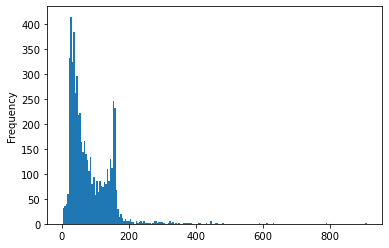

In [43]:
mensajes_dataframe["longitud"].plot.hist(bins=200) #hay muchisimos mensajes entre 0 y 200 caracteres y algunos que casi llegan a 1000

In [45]:
mensajes_dataframe["longitud"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: longitud, dtype: float64

In [48]:
#averiguar el mensaje con el mayor valor(910.000000)
mensajes_dataframe[mensajes_dataframe["longitud"] == 910]["mensaje"]

1085    For me the love should start with attraction.i...
Name: mensaje, dtype: object


In [49]:
#para ver todo el mensaje usamos iloc
mensajes_dataframe[mensajes_dataframe["longitud"] == 910]["mensaje"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

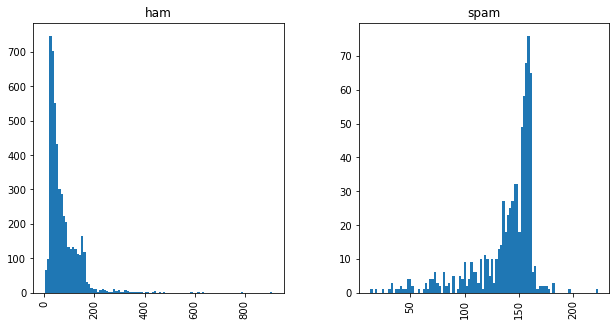

In [50]:
mensajes_dataframe.hist(column="longitud", by="etiqueta", bins=100, figsize=(10,5))

# Procesamiento de textos

In [51]:
import string

In [52]:
cadena = "Hola mundo ejemplo! Nota: Este mensaje tiene signos de puntuación."
cadena

'Hola mundo ejemplo! Nota: Este mensaje tiene signos de puntuación.'

In [53]:
#eliminar signos de puntuacion
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
sin_puntuacion = [c for c in cadena if c not in string.punctuation]
sin_puntuacion = "".join(sin_puntuacion)
sin_puntuacion

'Hola mundo ejemplo Nota Este mensaje tiene signos de puntuación'

In [62]:
# eliminar palabras que no son utiles
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erik_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [64]:
stopwords.words("spanish")

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [65]:
palabras = sin_puntuacion.split()
palabras

['Hola',
 'mundo',
 'ejemplo',
 'Nota',
 'Este',
 'mensaje',
 'tiene',
 'signos',
 'de',
 'puntuación']

In [84]:
cadena_limpia = [palabra for palabra in palabras if palabra.lower() not in stopwords.words("spanish")]
cadena_limpia

['Hola', 'mundo', 'ejemplo', 'Nota', 'mensaje', 'signos', 'puntuación']

In [69]:
# funcion para procesar datos

In [78]:
def procesar_texto(cadena):
    sin_puntuacion = [c for c in cadena if c not in string.punctuation]
    sin_puntuacion = "".join(sin_puntuacion)
    palabras = sin_puntuacion.split()
    cadena_limpia = [palabra for palabra in palabras if palabra.lower() not in stopwords.words("spanish")]
    cadena_limpia = [palabra for palabra in cadena_limpia if palabra.lower() not in stopwords.words("english")]
    return cadena_limpia

In [85]:
cadena = "Hola mundo ejemplo! Nota: Este mensaje tiene signos de puntuación!!!!.!!"
resultado = procesar_texto(cadena)
resultado

['Hola', 'mundo', 'ejemplo', 'Nota', 'mensaje', 'signos', 'puntuación']

In [86]:
mensajes_dataframe.head()

,etiqueta,mensaje,longitud
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [87]:
mensajes_dataframe["mensaje"].head(5).apply(procesar_texto)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: mensaje, dtype: object

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
#asignar un numero a todas las palabras importantes
transformador = CountVectorizer(analyzer=procesar_texto).fit(mensajes_dataframe["mensaje"])

In [90]:
print(transformador.vocabulary_)

{'Go': 2051, 'jurong': 7530, 'point': 8886, 'crazy': 5751, 'Available': 1108, 'bugis': 5200, 'n': 8307, 'great': 6913, 'world': 11128, 'buffet': 5199, 'Cine': 1481, 'got': 6882, 'amore': 4635, 'wat': 10930, 'Ok': 3052, 'lar': 7675, 'Joking': 2441, 'wif': 11037, 'u': 10664, 'oni': 8560, 'Free': 1932, 'entry': 6308, '2': 423, 'wkly': 11088, 'comp': 5601, 'win': 11049, 'FA': 1824, 'Cup': 1549, 'final': 6533, 'tkts': 10479, '21st': 443, 'May': 2792, '2005': 430, 'Text': 3940, '87121': 871, 'receive': 9221, 'questionstd': 9128, 'txt': 10652, 'rateTCs': 9169, 'apply': 4713, '08452810075over18s': 73, 'U': 4055, 'dun': 6184, 'say': 9523, 'early': 6201, 'hor': 7161, 'c': 5243, 'already': 4611, 'Nah': 2936, 'dont': 6103, 'think': 10400, 'goes': 6853, 'usf': 10764, 'lives': 7816, 'around': 4759, 'though': 10417, 'FreeMsg': 1934, 'Hey': 2212, 'darling': 5846, '3': 543, 'weeks': 10976, 'word': 11115, 'back': 4875, 'Id': 2336, 'like': 7774, 'fun': 6731, 'still': 10060, 'Tb': 3917, 'ok': 8537, 'XxX':

In [91]:
mensaje3 = mensajes_dataframe["mensaje"][3]
mensaje3

'U dun say so early hor... U c already then say...'

In [93]:
mensaje3_transformado = transformador.transform([mensaje3])

In [94]:
print(mensaje3_transformado) #<- acá se ve que palabras hay, segun el elemento que se le asignó anteriormente.

  (0, 4055)	2
  (0, 4611)	1
  (0, 5243)	1
  (0, 6184)	1
  (0, 6201)	1
  (0, 7161)	1
  (0, 9523)	2


In [95]:
transformador.get_feature_names()[4055]

'U'

In [96]:
transformador.get_feature_names()[9523]

'say'

# Prediccion

In [97]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline #<- para ejectuar varias instancias al mismo tiempo
from sklearn.metrics import classification_report

In [98]:
#dividimos los mensajes   m -> mensaje, e -> etiqueta
m_train, m_test, e_train , e_test = train_test_split(mensajes_dataframe["mensaje"],mensajes_dataframe["etiqueta"], test_size=0.3)

In [100]:
# distintos pasos que tiene que seguir para ser entrenado
pipeline = Pipeline([
    ("vectorizar",CountVectorizer(analyzer=procesar_texto)),
    ("transformar",TfidfTransformer()),
    ("clasificar",RandomForestClassifier())
])

In [101]:
pipeline.fit(m_train,e_train)

Pipeline(steps=[('vectorizar',
                 CountVectorizer(analyzer=<function procesar_texto at 0x000002010B211160>)),
                ('transformar', TfidfTransformer()),
                ('clasificar', RandomForestClassifier())])

In [102]:
predicciones = pipeline.predict(m_test)

In [105]:
print(classification_report(e_test, predicciones))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1447
        spam       1.00      0.82      0.90       225

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672

